# Librairie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('Base.csv')

# Exploration

In [5]:
df.head(5)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...                0   
1               -0.849551           AD          1658  ...                0   
2               -1.490386           AB          1095  ...                0   
3               -1.863101           AB          3483  ...                0   
4               47.152498           AA          2339  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                 1500.0                0  INTERNET   
1                 1500.0                0  INTERNET   
2                  200.0                0  INTERNET   
3                  200.0                0  INTERNET   
4                  200.0                0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                   1   
1                   3.363854     other                   1   
2                  22.730559   windows                   0   
3                  15.215816     linux                   1   
4                   3.743048     other                   0   

   device_distinct_emails_8w device_fraud_count  month  
0                          1                  0      0  
1                          1                  0      0  
2                          1                  0      0  
3                          1                  0      0  
4                          1                  0      0  

[5 rows x 32 columns]

In [ ]:
df.info()

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


# Basic Statistics for Numerical and Categorical Columns

In [ ]:
statistics = df.describe()
print("Descriptive Statistics (Numerical Columns):\n", statistics)

In [ ]:
categorical_columns = [
    'payment_type', 'employment_status', 'email_is_free', 'housing_status',
    'source', 'device_os', 'keep_alive_session']

for column in categorical_columns:
    print(f"Distribution of {column}:\n", df[column].value_counts())

# Visualize Distributions

In [4]:
fig = px.bar(
    df,
    x='fraud_bool',
    y='customer_age',
    color='fraud_bool',
    title='Customer Age Distribution: Frauds vs. Non-Frauds',
    labels={'customer_age': 'Customer Age', 'fraud_bool': 'Fraud Status'},
    color_discrete_map={0: 'mediumpurple', 1: 'purple'})

fig.show()

In [ ]:
fig = px.histogram(
    df,
    x= df[df['fraud_bool'] == 1]['income'],
    nbins=30,
    title='Distribution of Income',
    labels={'income': 'Income'},
    template='plotly_white',
    color_discrete_sequence=['purple'])

fig.update_traces(marker_line_color='white', marker_line_width=1.5)

fig.show()

In [ ]:
# Filter the dataset for fraud cases (fraud_bool = 1) with income = 0.9 and compute the proportion
fraud_cases = df[df['fraud_bool'] == 1]

fraud_income_09 = fraud_cases[fraud_cases['income'] == 0.9]

proportion_income_09_in_fraud = len(fraud_income_09) / len(fraud_cases)

print(f"Proportion of Fraudsters with Income = 0.9: {proportion_income_09_in_fraud:.4f}")


Proportion of Fraudsters with Income = 0.9: 0.4344


In [ ]:
num_columns = [
    'income', 'name_email_similarity', 'prev_address_months_count',
    'current_address_months_count', 'customer_age', 'days_since_request',
    'intended_balcon_amount', 'zip_count_4w', 'date_of_birth_distinct_emails_4w',
    'credit_risk_score', 'proposed_credit_limit', 'session_length_in_minutes',
    'device_distinct_emails_8w', 'device_fraud_count', 'month']

for column in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


# Code to Count Fraud and Non-Fraud Cases

Number of Non-Fraud Cases (0): 988971
Number of Fraud Cases (1): 11029


<ipython-input-8-ad68a377fff0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




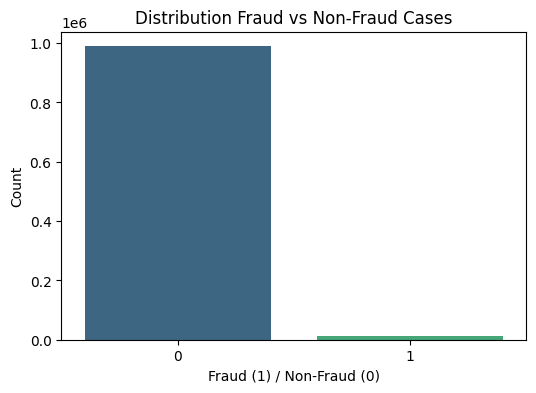

In [8]:
fraud_counts = df['fraud_bool'].value_counts()

print("Number of Non-Fraud Cases (0):", fraud_counts[0])
print("Number of Fraud Cases (1):", fraud_counts[1])

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title("Distribution Fraud vs Non-Fraud Cases")
plt.xlabel("Fraud (1) / Non-Fraud (0)")
plt.ylabel("Count")
plt.show()

# Sampling and Blanced the dataset

In [9]:
fraud_cases = df[df['fraud_bool'] == 1]
non_fraud_cases = df[df['fraud_bool'] == 0]

balanced_non_fraud = non_fraud_cases.sample(len(fraud_cases), random_state=42)

In [10]:
balanced_non_fraud.head(10)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
518794           0     0.8               0.735925                        104   
567631           0     0.9               0.313330                         -1   
269688           0     0.1               0.129044                         -1   
375838           0     0.9               0.071233                         -1   
558695           0     0.1               0.920019                         62   
665065           0     0.7               0.914232                         -1   
475752           0     0.9               0.626473                         -1   
62621            0     0.1               0.042778                         26   
70574            0     0.8               0.500511                         -1   
808279           0     0.8               0.990455                         -1   

        current_address_months_count  customer_age  days_since_request  \
518794                            10            30            0.030076   
567631                            30            30            0.002789   
269688                           238            20            0.013602   
375838                            65            30            0.005794   
558695                            13            30            0.018723   
665065                           176            40            0.007008   
475752                            32            40            0.047802   
62621                             33            30            0.008926   
70574                             18            20            0.033278   
808279                            43            30            0.002686   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
518794               -1.480613           AB          2062  ...   
567631               -1.303670           AB          1498  ...   
269688               -1.027149           AB          1019  ...   
375838               -0.877066           AD          1140  ...   
558695               50.296179           AA          1103  ...   
665065               -0.231557           AB          1318  ...   
475752               -0.211306           AB          3151  ...   
62621                -0.801868           AB          1059  ...   
70574                -1.001333           AB          4242  ...   
808279               32.936978           AA           638  ...   

        has_other_cards  proposed_credit_limit  foreign_request    source  \
518794                0                  200.0                0  INTERNET   
567631                0                  200.0                0  INTERNET   
269688                0                  200.0                0  INTERNET   
375838                1                  200.0                0  INTERNET   
558695                0                 1500.0                0  INTERNET   
665065                0                 1000.0                0  INTERNET   
475752                0                  200.0                0  INTERNET   
62621                 0                  200.0                0  INTERNET   
70574                 0                  200.0                0  INTERNET   
808279                1                  500.0                0  INTERNET   

        session_length_in_minutes device_os  keep_alive_session  \
518794                   3.742273     other                   1   
567631                   3.669544     other                   1   
269688                   3.411296     linux                   1   
375838                   5.310112     linux                   1   
558695                  20.368814     linux                   1   
665065                   1.416454   windows                   0   
475752                   2.621725     other                   1   
62621                    6.598296     other                   1   
70574                   15.987956     other                   0   
808279                   6.402139     other                   0   


In [12]:
#on ne peut pas utiliser la fonction append
balanced_df = pd.concat([fraud_cases, balanced_non_fraud])

balanced_df = balanced_df.sample(frac=1, random_state=42)

print(balanced_df['fraud_bool'].value_counts())


fraud_bool
0    11029
1    11029
Name: count, dtype: int64


# Display a Correlation matrix

In [13]:
correlation_matrix = balanced_df.select_dtypes(exclude="object").corr().round(2)

In [14]:
px.imshow(correlation_matrix, color_continuous_scale="rdylbu", width=1000, height=1000, text_auto=True).update_xaxes(tickangle=-45)

# Visualization with Plotly: Boxplot for fraud_bool and income

In [19]:
fig = px.box(
    balanced_df,
    x="fraud_bool",
    y="income",
    color="fraud_bool",
    title="Box Plot of Income by Fraud Bool",
    labels={"fraud_bool": "0 = Non-Fraud, 1 = Fraud", "income": "Income"},
    color_discrete_map={0: "grey", 1: "purple"})
fig.show()

In [21]:
# Separate income values for fraud and non-fraud
income_fraud = balanced_df[balanced_df['fraud_bool'] == 1]['income']
income_non_fraud = balanced_df[balanced_df['fraud_bool'] == 0]['income']

# Perform t-test
t_stat, p_value = ttest_ind(income_fraud, income_non_fraud, equal_var=False)

print("T-Test for Income by Fraud Bool:")
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

T-Test for Income by Fraud Bool:
T-Statistic: 35.30036017751205
P-value: 1.5942413840893176e-265


# Visualization with Plotly: Boxplot for fraud_bool and credit_score_risk

In [20]:
fig = px.box(
    balanced_df,
    x="fraud_bool",
    y="credit_risk_score",
    color="fraud_bool",
    title="Box Plot of Credit Risk Score by Fraud Bool",
    labels={"fraud_bool": "Fraud (0 = Non-Fraud, 1 = Fraud)", "credit_risk_score": "Credit Risk Score"},
    color_discrete_map={0: "blue", 1: "red"})
fig.show()

In [ ]:
credit_risk_fraud = balanced_df[balanced_df['fraud_bool'] == 1]['credit_risk_score']
credit_risk_non_fraud = balanced_df[balanced_df['fraud_bool'] == 0]['credit_risk_score']

t_stat, p_value = ttest_ind(credit_risk_fraud, credit_risk_non_fraud, equal_var=False)

print("T-Test for Credit Risk Score by Fraud Bool:")
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

T-Test for Credit Risk Score by Fraud Bool:
T-Statistic: 46.528812423440776
P-value: 0.0


# Fraud_bool and payment_type

In [24]:
payment_fraud_counts = balanced_df.groupby(['fraud_bool', 'payment_type']).size().reset_index(name='count')

fig = px.bar(
    payment_fraud_counts,
    x="payment_type",
    y="count",
    color="fraud_bool",
    barmode="group",
    title="Distribution of Payment Type by Fraud Bool",
    labels={"fraud_bool": "Fraud (0 = Non-Fraud, 1 = Fraud)", "count": "Count", "payment_type": "Payment Type"})

fig.show()

In [ ]:
contingency_table = pd.crosstab(balanced_df['fraud_bool'], balanced_df['payment_type'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

payment_type    AA    AB    AC    AD  AE
fraud_bool                              
0             2823  4139  2774  1289   4
1             1364  4169  4209  1286   1
Chi-Square Test Results:
Chi-Square Statistic: 805.2054248345922
P-value: 5.7255560976797066e-173


# Fraud_bool and device_os

In [ ]:
contingency_table = pd.crosstab(balanced_df['fraud_bool'], balanced_df['device_os'])
print(contingency_table)

device_os   linux  macintosh  other  windows  x11
fraud_bool                                       
0            3682        602   3821     2855   69
1            1715        752   1974     6507   81


In [25]:
device_os_fraud_counts = balanced_df.groupby(['fraud_bool', 'device_os']).size().reset_index(name='count')

fig = px.bar(
    device_os_fraud_counts,
    x="device_os",
    y="count",
    color="fraud_bool",
    barmode="group",
    title="Distribution of Device OS by Fraud Bool",
    labels={"fraud_bool": "Fraud (0 = Non-Fraud, 1 = Fraud)", "count": "Count", "device_os": "Device OS"})

fig.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Results:
Chi-Square Statistic: 2747.754989836334
P-value: 0.0


# Shapiro-Wilk Test for Normality: Assessing Whether the Data Follows a Normal Distribution

In [ ]:
from scipy.stats import shapiro

columns = balanced_df.select_dtypes(exclude="object")

for i in columns:
    statistic, p_value = shapiro(balanced_df[i])
    print(p_value)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.111409694329013e-42
0.0
0.0
0.0
3.572054399565477e-37
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


# Then I decided to use Non Parametric Test

# Fraud_bool and income

In [ ]:
income_fraud = balanced_df[balanced_df['fraud_bool'] == 1]['income']
income_non_fraud = balanced_df[balanced_df['fraud_bool'] == 0]['income']

u_stat, p_value = mannwhitneyu(income_fraud, income_non_fraud, alternative='greater')

print(p_value)


# Fraud_bool and customer_age

In [ ]:
customer_age_fraud = balanced_df[balanced_df['fraud_bool'] == 1]['customer_age']
customer_age_non_fraud = balanced_df[balanced_df['fraud_bool'] == 0]['customer_age']

u_stat, p_value = mannwhitneyu(customer_age_fraud, customer_age_non_fraud, alternative='two-sided')

print(p_value)

# ENCODING Object type variables

In [ ]:
categorical_columns = balanced_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')


In [ ]:
categorical_columns = balanced_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(balanced_df[col].unique(), "\n")


Unique values in payment_type:
['AB' 'AC' 'AA' 'AD' 'AE'] 

Unique values in employment_status:
['CC' 'CA' 'CE' 'CF' 'CB' 'CD' 'CG'] 

Unique values in housing_status:
['BB' 'BC' 'BE' 'BA' 'BD' 'BF' 'BG'] 

Unique values in source:
['INTERNET' 'TELEAPP'] 

Unique values in device_os:
['linux' 'windows' 'other' 'macintosh' 'x11'] 



# Encode the variable Source

In [ ]:
balanced_df['source'] = balanced_df['source'].map({'INTERNET': 1, 'TELEAPP': 0}).astype('int64')


# Encode all others categorical variables with One_Hot Encoding

In [ ]:
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'device_os']

encoded_df = pd.get_dummies(balanced_df, columns=categorical_columns, drop_first=True)

print(encoded_df.head())


        fraud_bool  income  name_email_similarity  prev_address_months_count  \
514822           0     0.8               0.752506                         -1   
509576           1     0.5               0.419879                         -1   
275683           0     0.4               0.245165                         -1   
148590           0     0.1               0.698450                         -1   
558577           0     0.6               0.221460                         -1   

        current_address_months_count  customer_age  days_since_request  \
514822                           103            30            0.057497   
509576                           166            30            0.038439   
275683                           236            50            0.005682   
148590                            49            20            2.469336   
558577                           158            30            0.018539   

        intended_balcon_amount  zip_count_4w  velocity_6h  ...  \
514822  

In [ ]:
encoded_df.info()

# Build a Logistic Regression Model

In [ ]:
X = encoded_df.drop(columns=['fraud_bool'])
y = encoded_df['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      3283
           1       0.70      0.69      0.70      3335

    accuracy                           0.70      6618
   macro avg       0.70      0.70      0.70      6618
weighted avg       0.70      0.70      0.70      6618

ROC-AUC Score: 0.7605724095003975


In [ ]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (15440, 47)
Testing set shape: (6618, 47)


# Evaluate features importance

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': logistic_model.coef_[0]}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
                              Feature  Importance
45                 device_os_windows    0.088275
14                     email_is_free    0.043297
0                             income    0.030657
4                       customer_age    0.029526
28                   payment_type_AC    0.027550
24         device_distinct_emails_8w    0.012056
20                   foreign_request    0.007927
43               device_os_macintosh    0.005452
13                 credit_risk_score    0.004503
32              employment_status_CC    0.003510
22         session_length_in_minutes    0.002466
3       current_address_months_count    0.002028
29                   payment_type_AD    0.001067
46                     device_os_x11    0.000761
19             proposed_credit_limit    0.000398
7                       zip_count_4w    0.000130
36              employment_status_CG    0.000088
41                 housing_status_BF    0.000070
25                device_fraud_count    0.000000

# Selection of the features

In [ ]:
important_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()

X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

print("Selected Features:", important_features)

Selected Features: ['device_os_windows', 'email_is_free', 'income', 'customer_age', 'payment_type_AC', 'device_distinct_emails_8w']


In [ ]:
X = encoded_df.drop(columns=['fraud_bool'])
y = encoded_df['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

selected_features = ['device_os_windows', 'email_is_free', 'income', 'payment_type_AC',
                     'customer_age', 'device_distinct_emails_8w', 'foreign_request']

X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

logistic_model_filtered = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_filtered.fit(X_train_filtered, y_train)

y_pred_filtered = logistic_model_filtered.predict(X_test_filtered)
y_pred_proba_filtered = logistic_model_filtered.predict_proba(X_test_filtered)[:, 1]

print("Classification Report (Filtered Features):\n", classification_report(y_test, y_pred_filtered))
print("ROC-AUC Score (Filtered Features):", roc_auc_score(y_test, y_pred_proba_filtered))

Classification Report (Filtered Features):
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      3283
           1       0.72      0.69      0.70      3335

    accuracy                           0.71      6618
   macro avg       0.71      0.71      0.71      6618
weighted avg       0.71      0.71      0.71      6618

ROC-AUC Score (Filtered Features): 0.7759892517950588


In [ ]:
coefficients = logistic_model_selected.coef_[0]

feature_importance_selected = pd.DataFrame({'Feature': selected_features,'Importance': coefficients})

In [ ]:
px.bar(feature_importance_df, x='Importance', y='Feature', title='Feature Importance for Selected Features')

# Build a Random Forest model on Encoded_df with all the columns

In [ ]:
X = encoded_df.drop(columns=['fraud_bool'])
y = encoded_df['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report (Encoded Data):\n", classification_report(y_test, y_pred))
print("ROC-AUC Score (Encoded Data):", roc_auc_score(y_test, y_pred_proba))

Classification Report (Encoded Data):
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      3283
           1       0.81      0.78      0.79      3335

    accuracy                           0.79      6618
   macro avg       0.79      0.79      0.79      6618
weighted avg       0.79      0.79      0.79      6618

ROC-AUC Score (Encoded Data): 0.8764132706720048


In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')

print("Cross-Validation Scores (ROC-AUC):", cv_scores)
print("Mean ROC-AUC Score:", np.mean(cv_scores))
print("Standard Deviation of ROC-AUC Scores:", np.std(cv_scores))

Cross-Validation Scores (ROC-AUC): [0.88395265 0.88593336 0.87423959 0.87144666 0.86450661]
Mean ROC-AUC Score: 0.8760157747035067
Standard Deviation of ROC-AUC Scores: 0.0079730163250032


In [ ]:
accuracy_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

error_scores = 1 - accuracy_scores

mean_error = np.mean(error_scores)

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Cross-Validation Error Scores:", error_scores)
print(f"Mean Error Score: {mean_error:.4f}")

Cross-Validation Accuracy Scores: [0.80235721 0.80711695 0.78989121 0.78916345 0.78485604]
Cross-Validation Error Scores: [0.19764279 0.19288305 0.21010879 0.21083655 0.21514396]
Mean Error Score: 0.2053
Standard Deviation of Error Scores: 0.0085


# Build XGBOOST Model on encoded_df

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(tree_method="gpu_hist")

xgb_params = {"xgbclassifier__n_estimators": [20, 40, 60, 80, 100],
              "xgbclassifier__max_depth": [2, 4, 6, 8, 10],
              "xgbclassifier__learning_rate": [0.05, 0.1, 0.15, 0.20],
              "xgbclassifier__min_child_weight": [1, 2, 3, 4],
              "xgbclassifier__subsample": [0.6, 0.8, 1.0],
              "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0]
             }

xgb_model = train_classifier(xgb, xgb_params, X_train, y_train)

xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve, recall_score

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

default_recall = recall_score(y_test, y_pred)

target_recall_threshold = 0.8
target_recall = recall_score(y_test, y_pred_proba >= target_recall_threshold)

print(f"Default Recall: {default_recall}")
print(f"Target Recall: {target_recall_threshold}")

In [ ]:
import xgboost as xgb

X = encoded_df.drop(columns=['fraud_bool'])
y = encoded_df['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]


print("Classification Report (XGBoost - CPU):\n", classification_report(y_test, y_pred))
print("ROC-AUC Score (XGBoost - CPU):", roc_auc_score(y_test, y_pred_proba))


Classification Report (XGBoost - CPU):
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      3283
           1       0.82      0.80      0.81      3335

    accuracy                           0.81      6618
   macro avg       0.81      0.81      0.81      6618
weighted avg       0.81      0.81      0.81      6618

ROC-AUC Score (XGBoost - CPU): 0.8910993482850411
